# Modelling & Diversity

## Prepocessing

La performance de cette compétition est mesuré avec le log de MSE sur la prédiction des revenues. Le meilleur score obtenu est de 0.68770. Le top 10 est inférieur à 1.48070 [leaderboard](https://www.kaggle.com/competitions/tmdb-box-office-prediction/leaderboard). \
Cependant, la plupart des algorithmes trouvés pour prédire le revenue utilisent des variables accessibles à postiori comme la popularité ou le vote des utilisateurs. \
Nous avons fait le choix de les éliminés pour être plus proche à une question réelle. \
On s'attend donc à obtenir des résultats plus faible nécessairement. \
Le log est utilisé pour éviter un sur-influence des blockbusters

In [3]:
# Libraries import
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor # ML
from sklearn.inspection import permutation_importance # computing feature importance
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor

In [4]:
df = pd.read_csv('./data/diversity.csv', delimiter=',')

In [5]:
df.head()

,adult,budget,original_language,revenue,runtime,spoken_languages,nb_language,nb_ch,r_fem_ch,r_hom_ch,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,nb_genre
0,False,30000000,1,3.735540e+08,81.0,1,1,13,0.230769,0.692308,...,0,0,0,0,0,0,0,0,0,3
1,False,65000000,1,2.627972e+08,104.0,1,2,26,0.230769,0.346154,...,0,0,0,0,0,0,0,0,0,3
2,False,0,1,1.121930e+07,101.0,1,1,7,0.428571,0.571429,...,0,0,0,1,0,0,0,0,0,2
3,False,16000000,1,8.145216e+07,127.0,1,1,10,0.400000,0.600000,...,0,0,0,1,0,0,0,0,0,3
4,False,0,1,7.657891e+07,106.0,1,1,12,0.416667,0.500000,...,0,0,0,0,0,0,0,0,0,1


In [6]:
df['log_revenue'] = np.log(df['revenue'] + 1e-5)

In [7]:
# df.pop('budget')

In [8]:
# Exctraction de la variable d'intérêt
# df['Profit'] = df['revenue'] - df['budget']
y = df['log_revenue']
X = df.drop(['revenue','log_revenue'], axis=1)

In [9]:
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)

In [10]:
X_train_full.head()

,adult,budget,original_language,runtime,spoken_languages,nb_language,nb_ch,r_fem_ch,r_hom_ch,order_fem,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,nb_genre
7660,False,0,1,90.0,1,1,13,0.076923,0.692308,12,...,0,0,0,0,1,0,0,0,0,3
10763,False,0,1,90.0,1,1,6,0.500000,0.500000,0,...,1,0,1,0,0,0,1,0,0,5
38005,False,0,0,55.0,0,1,1,0.000000,0.000000,1,...,0,0,0,0,0,0,0,0,0,1
37470,False,0,0,30.0,0,1,0,0.000000,0.000000,0,...,0,0,0,0,0,0,0,0,0,1
35611,False,0,0,118.0,0,1,13,0.307692,0.230769,2,...,0,0,0,0,0,0,0,0,0,1


 ## Random Forest Model

In [11]:
# Defining the Random Forest Model 
rf_model = RandomForestRegressor(random_state=1)

# Fitting the model 
rf_model.fit(X_train_full, y_train)

RandomForestRegressor(random_state=1)

In [12]:
y_pred_rf = rf_model.predict(X_valid_full)

In [13]:
mae_rf = mean_absolute_error(y_pred_rf, y_valid)
msq_rf = mean_squared_error(y_pred_rf, y_valid)
print("Mean Absolute Error RF:" , mae_rf)
print("Mean Squarre Error RF:" , msq_rf)
# Mean Absolute Error RF: 0.4612323137997763
# Mean Squarre Error RF: 1.4574452665008446

Mean Absolute Error RF: 0.4618028757764209
Mean Squarre Error RF: 1.4595240726260519


Notre MAE n'est pas si mal comparé aux résultats obtenue dans certains notebook kaggle faisant appel à des variables à postiori.

<AxesSubplot:>

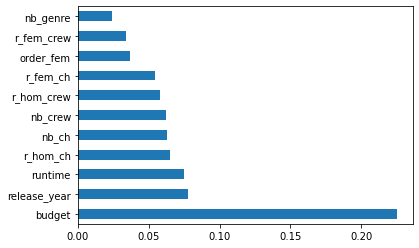

In [14]:
feat_importances = pd.Series(rf_model.feature_importances_, index=X_train_full.columns)
feat_importances.nlargest(11).plot(kind='barh')

On peut être relativement satisfait, l'influence du bugdet est certe important mais il n'est pas plus important que sur les autres résultats des algorithmes des notebooks de kaggle.
De plus, on peut voir que le ratio femme/homme semble aussi avoir une influence importante dans les revenues.

## XGBOOST Model

In [15]:
# Define the model
xgb_model = XGBRegressor()

# Fit the model
xgb_model.fit(X_train_full, y_train) 

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [16]:
y_pred_xgb = xgb_model.predict(X_valid_full)

In [17]:
mae_xgb = mean_squared_error(y_pred_xgb, y_valid)

print("Mean Absolute Error XGBOOST:" , mae_xgb)

Mean Absolute Error XGBOOST: 1.4553362884608552


<AxesSubplot:>

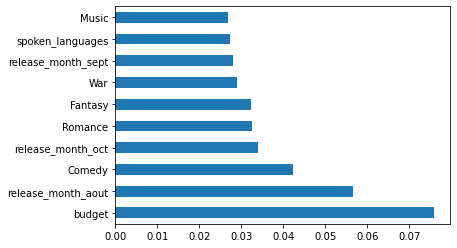

In [18]:
feat_importances = pd.Series(xgb_model.feature_importances_, index=X_train_full.columns)
feat_importances.nlargest(10).plot(kind='barh')

Il est intéressant de noter que cette fois-ci les variables relatives à la diversité ne sont plus aussi importante qu'avec notre model de random forest.

## Amélioration des modèles avec GridsearchVC

### Random Forest

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
param_grid = { 'n_estimators': [400],
               'max_depth': [10],
               'min_samples_split': [6,8],
               'min_samples_leaf': [3]}

In [21]:
rf = RandomForestRegressor()

In [22]:
scoring = "neg_mean_squared_error"
grid_search = GridSearchCV(estimator=rf,scoring=scoring, param_grid=param_grid, cv=3, n_jobs=-1)

In [23]:
grid_search.fit(X_train_full, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10], 'min_samples_leaf': [3],
                         'min_samples_split': [6, 8], 'n_estimators': [400]},
             scoring='neg_mean_squared_error')

In [24]:
print(-(grid_search.score(X_valid_full, y_valid)))
print(grid_search.best_estimator_)

1.3956773004374272
RandomForestRegressor(max_depth=10, min_samples_leaf=3, min_samples_split=8,
                      n_estimators=400)


### XGBoost

In [25]:
params = {'learning_rate': [0.1, 0.2, 0.3],
          'max_depth': [3, 4, 5],
          'n_estimators': [100, 150, 200]}

In [26]:
model = XGBRegressor()
grid_search_XB = GridSearchCV(model, params, cv=3, verbose=1, n_jobs=-1, scoring = "neg_mean_squared_error")

In [27]:
grid_search_XB.fit(X_train_full, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estim

In [28]:
print("Score MSE :",- grid_search_XB.score(X_valid_full, y_valid))
print("Meilleurs hyperparamètres :", grid_search_XB.best_params_)

Score MSE : 1.3898706838216797
Meilleurs hyperparamètres : {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


On a une petite amélioration de XGBoost et Random Forest.

## Amélioration des modèles par cross validation

### Random Forest

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
rf = RandomForestRegressor(max_depth=10, min_samples_leaf=3, min_samples_split=6,n_estimators=400)
scores = cross_val_score(rf, X_train_full, y_train, scoring="neg_mean_squared_error", cv = 8)
print(-scores.mean())

1.1928347625703157


### XGBoost

In [31]:
XG = XGBRegressor(learning_rate= 0.1, max_depth =5, n_estimators = 100)
scores_XG = cross_val_score(XG, X_train_full, y_train, scoring="neg_mean_squared_error", cv = 8)
print(-scores_XG.mean())

1.2016948281026876


En récupérant les résulats de gridsearch et effectuant une cross validation on obtient une amélioration des performances.
Cette fois-ci la différence entre Random Forest et XGBoost se creuse en faveur du Random Forest.

Le résultat est étonnamement pas mauvais. Un score de 1.19 correspond à une position de 6 ème dans le leaderboard de la compétition kaggle. \
Bien entendu la compétition a eu lieu il y a 4 ans maintenant et les algorithmes ont évolé depuis mais dans le cas présent nous n'avons même pas utilisé des variables poutant évidantes et autorisées pour la prédiction. \
Essayons maintenant de mettre en place des algorithmes plus complexe (Voir Notebook Diversity__NN)
